In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import Day
from collections import Counter, OrderedDict
import operator 

In [2]:
txn = pd.read_csv('/content/Retail_Data_Transactions.csv')

In [3]:
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


1.  Import the dataset as txn  and identify the number of rows

In [4]:
print(' The number of rows are: {}' .format(txn.shape[0]))

 The number of rows are: 125000


2.  The date-format in column ’trans_date’ is not standard. Create a new column ’txn_date’from ’trans_date’ with pd.todatetime and drop the column ’trans_date’.

In [5]:
txn['trans_date'] = pd.to_datetime(txn['trans_date'])
txn.rename(columns={"trans_date":"txn_date"},inplace=True)

In [6]:
txn.head()

,customer_id,txn_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


3.  Identify the min() and max() of column ’txndate’.

In [7]:
print('Min of column txn_date {}'.format(txn['txn_date'].min()))
print('Max of column txn_date {}'.format(txn['txn_date'].max()))

Min of column txn_date 2011-05-16 00:00:00
Max of column txn_date 2015-03-16 00:00:00


4.  Create  the  column  ’ME_DT’:  the  last  day  of  the  month  in  the  ’transdate’  column.DateOffset objects is a simple way to do this in pandas.

In [8]:
txn['ME_DT'] = txn['txn_date'] + pd.offsets.MonthEnd(n=0)

In [9]:
txn.iloc[55:60,:]

,customer_id,txn_date,tran_amount,ME_DT
55,CS2662,2014-08-31,88,2014-08-31
56,CS2209,2012-03-12,35,2012-03-31
57,CS4530,2011-06-05,40,2011-06-30
58,CS2848,2013-02-04,53,2013-02-28
59,CS2596,2011-09-19,55,2011-09-30


5.  Create the column ’YEAR’: the year in the ’transdate’ column.  DatetimeIndex withattribute .year will help you do so.

In [10]:
txn['YEAR'] = txn['txn_date'].dt.year

In [11]:
txn.head()

,customer_id,txn_date,tran_amount,ME_DT,YEAR
0,CS5295,2013-02-11,35,2013-02-28,2013
1,CS4768,2015-03-15,39,2015-03-31,2015
2,CS2122,2013-02-26,52,2013-02-28,2013
3,CS1217,2011-11-16,99,2011-11-30,2011
4,CS1850,2013-11-20,78,2013-11-30,2013


#1.2  Create features that capture annual spending

1.  Using groupby and NamedAgg createclntannualaggregations, the annual aggre-gations dataframe:  with sum, mean, std, var, sem, max, min, count as the aggregationfunctions.  A snapshot of the output table is shown below.  Notice that the output is atypical MultiIndex pandas dataframe.

In [12]:
clnt_annual_aggregations = txn.groupby(by=['customer_id','YEAR'])\
                            .agg(ann_txn_amt_sum = ('tran_amount','sum'),\
                            ann_txn_amt_mean=('tran_amount','mean'),\
                            ann_txn_amt_std = ('tran_amount','std'),\
                            ann_txn_amt_var = ('tran_amount','var'),\
                            ann_txn_amt_sem = ('tran_amount','sem'),\
                            ann_txn_amt_max = ('tran_amount','max'),\
                            ann_txn_amt_min = ('tran_amount','min'),\
                            ann_txn_amt_cnt = ('tran_amount','count'))


In [13]:
clnt_annual_aggregations.head()


ann_txn_amt_sum  ...  ann_txn_amt_cnt
customer_id YEAR                   ...                 
CS1112      2011              212  ...                3
            2012              337  ...                5
            2013              212  ...                3
            2014              212  ...                3
            2015               39  ...                1

[5 rows x 8 columns]

2.  Plot the histogram of the sum and count.

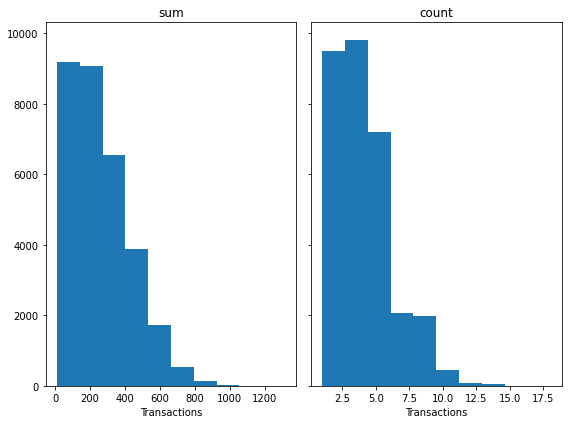

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8,6))
ax1.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
ax1.set_title('sum')
ax1.set_xlabel('Transactions')
ax2.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
ax2.set_title('count')
ax2.set_xlabel('Transactions')
plt.tight_layout()

3.  Reset  the  index  and  reshape  the  table  with  the  pivottable  function  to  create  theclntannualaggregationspivottable shown below with 40 columns (why 40?).You  should  expect  columns  with  NaN  values.   Impute  the  NaN  entries  when  youperform the pivottable function and explain your choice of values.

**Answer:**

**The dataset has 40 columns since the dataset contains information about five years from 2011 to 2015 where each year has 8 aggregations/features.
We impute the Nan values by zero as the Nan values actually indicates that no transactions were made in that year.**

In [15]:
clnt_annual_aggregations.reset_index(inplace=True)
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot(index = 'customer_id',columns='YEAR')
clnt_annual_aggregations_pivot.head()

ann_txn_amt_sum                       ... ann_txn_amt_cnt               
YEAR                   2011   2012   2013   2014  ...            2012 2013 2014 2015
customer_id                                       ...                               
CS1112                212.0  337.0  212.0  212.0  ...             5.0  3.0  3.0  1.0
CS1113                244.0  374.0  426.0  226.0  ...             5.0  5.0  4.0  3.0
CS1114                426.0  150.0  352.0  425.0  ...             2.0  5.0  6.0  1.0
CS1115                261.0  473.0  557.0  313.0  ...             7.0  7.0  4.0  1.0
CS1116                235.0  230.0   59.0  333.0  ...             3.0  1.0  5.0  NaN

[5 rows x 40 columns]

In [16]:
#checking number of rows and columns
print(clnt_annual_aggregations_pivot.shape)

(6889, 40)


In [17]:
#checking null values
clnt_annual_aggregations_pivot.isnull().sum()

                  YEAR
ann_txn_amt_sum   2011     388
                  2012      80
                  2013      85
                  2014      88
                  2015    2664
ann_txn_amt_mean  2011     388
                  2012      80
                  2013      85
                  2014      88
                  2015    2664
ann_txn_amt_std   2011    1485
                  2012     431
                  2013     417
                  2014     386
                  2015    5173
ann_txn_amt_var   2011    1485
                  2012     431
                  2013     417
                  2014     386
                  2015    5173
ann_txn_amt_sem   2011    1485
                  2012     431
                  2013     417
                  2014     386
                  2015    5173
ann_txn_amt_max   2011     388
                  2012      80
                  2013      85
                  2014      88
                  2015    2664
ann_txn_amt_min   2011     388
                

In [18]:
# Imputing nan values with zero
clnt_annual_aggregations_pivot.fillna('0',inplace=True)

In [19]:
#checking null values after imputation
clnt_annual_aggregations_pivot.isnull().sum()

                  YEAR
ann_txn_amt_sum   2011    0
                  2012    0
                  2013    0
                  2014    0
                  2015    0
ann_txn_amt_mean  2011    0
                  2012    0
                  2013    0
                  2014    0
                  2015    0
ann_txn_amt_std   2011    0
                  2012    0
                  2013    0
                  2014    0
                  2015    0
ann_txn_amt_var   2011    0
                  2012    0
                  2013    0
                  2014    0
                  2015    0
ann_txn_amt_sem   2011    0
                  2012    0
                  2013    0
                  2014    0
                  2015    0
ann_txn_amt_max   2011    0
                  2012    0
                  2013    0
                  2014    0
                  2015    0
ann_txn_amt_min   2011    0
                  2012    0
                  2013    0
                  2014    0
                  2015   

4.  The pivoted object you created is a MultiIndex object with hierarchical indexes.  Youcan  see  the  first  level  (i.e.   0)  in  the  snapshot  above  with  names  ’anntxnamtave’,’anntxnamtmax’  (and  more  as  indicated  by  the  ...)   and  the  second  level  (i.e.   1)with names ’2011’, ’2012’, etc.  You can confirm the multiple levels of the columns withthe following two expressions.What are your observations regarding the number of levels and the column names?

**Answer:**

**We observe that the columns are categorized into first and second levels. The first level denotes the aggregation strategy while the second level denotes the Year.**

In [20]:
#verify multiple levels of columns
clnt_annual_aggregations_pivot.columns.nlevels
clnt_annual_aggregations_pivot.columns

MultiIndex([( 'ann_txn_amt_sum', 2011),
            ( 'ann_txn_amt_sum', 2012),
            ( 'ann_txn_amt_sum', 2013),
            ( 'ann_txn_amt_sum', 2014),
            ( 'ann_txn_amt_sum', 2015),
            ('ann_txn_amt_mean', 2011),
            ('ann_txn_amt_mean', 2012),
            ('ann_txn_amt_mean', 2013),
            ('ann_txn_amt_mean', 2014),
            ('ann_txn_amt_mean', 2015),
            ( 'ann_txn_amt_std', 2011),
            ( 'ann_txn_amt_std', 2012),
            ( 'ann_txn_amt_std', 2013),
            ( 'ann_txn_amt_std', 2014),
            ( 'ann_txn_amt_std', 2015),
            ( 'ann_txn_amt_var', 2011),
            ( 'ann_txn_amt_var', 2012),
            ( 'ann_txn_amt_var', 2013),
            ( 'ann_txn_amt_var', 2014),
            ( 'ann_txn_amt_var', 2015),
            ( 'ann_txn_amt_sem', 2011),
            ( 'ann_txn_amt_sem', 2012),
            ( 'ann_txn_amt_sem', 2013),
            ( 'ann_txn_amt_sem', 2014),
            ( 'ann_txn_amt_sem', 2015),


In [21]:
#creating single level for future use
#collects level 1 fetaures
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
#collects level 2 features
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

5.  Finally,  you  want  to  save  the  dataframeclntannualaggregationspivotas  an.xlsx  file  for  future  use  in  the  machine  learning  assignment.   To  do  so,  you  wantto  remove  the  two  levels  in  columns  and  create  a  single  level  with  column  names:’anntxnamtave2011’, ’anntxnamtave2012’, etc.  To do so, use the code snippetbelow prior to saving the dataframe as an Excel file.

In [22]:
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_mean_2011,ann_txn_amt_mean_2012,ann_txn_amt_mean_2013,ann_txn_amt_mean_2014,ann_txn_amt_mean_2015,ann_txn_amt_std_2011,ann_txn_amt_std_2012,ann_txn_amt_std_2013,ann_txn_amt_std_2014,ann_txn_amt_std_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_amt_sem_2011,ann_txn_amt_sem_2012,ann_txn_amt_sem_2013,ann_txn_amt_sem_2014,ann_txn_amt_sem_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,212,337,212,212,39,70.6667,67.4,70.6667,70.6667,39,22.0303,12.7201,34.5012,16.8622,0,485.333,161.8,1190.33,284.333,0,12.7192,5.68859,19.9193,9.73539,0,96,81,105,90,39,56,52,36,59,39,3,5,3,3,1
CS1113,244,374,426,226,220,81.3333,74.8,85.2,56.5,73.3333,21.0792,17.0353,13.0843,27.9583,27.3008,444.333,290.2,171.2,781.667,745.333,12.1701,7.6184,5.8515,13.9792,15.7621,94,95,97,97,98,57,51,65,36,44,3,5,5,4,3
CS1114,426,150,352,425,79,85.2,75,70.4,70.8333,79,9.73139,31.1127,24.8857,26.9475,0,94.7,968,619.3,726.167,0,4.35201,22,11.1292,11.0013,0,97,97,105,95,79,76,53,43,37,79,5,2,5,6,1
CS1115,261,473,557,313,55,87,67.5714,79.5714,78.25,55,15,21.8469,10.5334,22.6329,0,225,477.286,110.952,512.25,0,8.66025,8.25734,3.98125,11.3165,0,102,104,94,98,55,72,41,66,50,55,3,7,7,4,1
CS1116,235,230,59,333,0,58.75,76.6667,59,66.6,0,21.2034,30.1386,0,25.2349,0,449.583,908.333,0,636.8,0,10.6017,17.4005,0,11.2854,0,87,105,59,96,0,41,45,59,40,0,4,3,1,5,0


6.  What are the possible disadvantages in capturing client transaction behavior with theannual features described in this section (if any)?

**Answer:**

**The categorization of transaction behaviour annually would not describe the complete pattern at different points in a year. We would not have information about the trajectory of transaction behaviour in a particular year.**

#1.3  Create monthly aggregations

1.  Create the dataframe that captures the monthlysum and count of transactions per client (nameitclntmonthlyaggregations).Use   thegroupby function with the Named Aggregationfeature which was introduced in pandas version0.25.0.  Make sure that you name the columnsas shown in the figure sample on the right.

In [23]:
#monthly sum and count using namedagg
clnt_monthly_aggregations = txn.groupby(["customer_id","ME_DT"])\
                               .agg(mth_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
                                mth_txn_cnt = pd.NamedAgg('tran_amount','count'))

In [24]:
clnt_monthly_aggregations.head(10)

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
            2012-07-31               81            1
            2012-09-30               72            1
            2012-12-31               76            1
            2013-03-31              105            1
            2013-07-31               36            1

2.  Create  a  histogram  of  both  columns  you  cre-ated.   What  are  your  observations?   What  arethe most common and maximum values for eachcolumn?  How do  they compare with the onesin section 1.2?

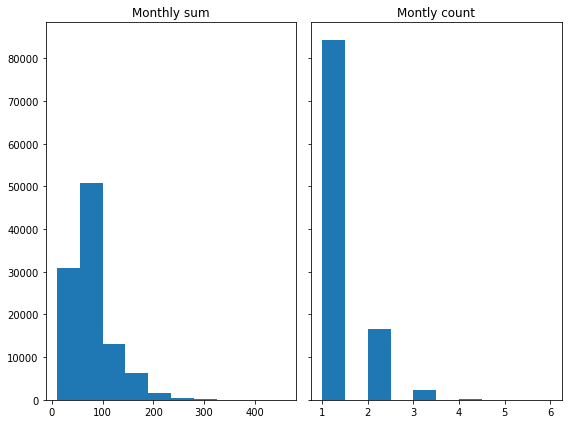

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8,6))
ax1.hist(clnt_monthly_aggregations["mth_txn_amt_sum"],)
ax1.set_title('Monthly sum')
ax2.hist(clnt_monthly_aggregations["mth_txn_cnt"])
ax2.set_title('Montly count')
plt.tight_layout()

In [26]:
clnt_monthly_aggregations['mth_txn_cnt'].describe()

count    103234.000000
mean          1.210841
std           0.475437
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: mth_txn_cnt, dtype: float64

In [27]:
clnt_monthly_aggregations['mth_txn_amt_sum'].describe()

count    103234.000000
mean         78.694897
std          41.529152
min          10.000000
25%          50.000000
50%          72.000000
75%          95.000000
max         460.000000
Name: mth_txn_amt_sum, dtype: float64

In [28]:
common_sum = Counter(clnt_monthly_aggregations.mth_txn_amt_sum).most_common(1)[0][0]
print('Most common sum value {}'.format(common_sum))

Most common sum value 77


In [29]:
common_count = Counter(clnt_monthly_aggregations['mth_txn_cnt']).most_common(1)[0][0]
print('Most common count value {}'.format(common_count))

Most common count value 1


**Answer:**    
**Monthlty sum: The monthly sum plot shows that the distribution is skewed and the maximum transaction is 460 dollars. The most common value is close to 77 dollars. The nature of the graph is very similar to the plot in 1.2**

**Count:**

**The plot for count shows the number of transactions customer made every month. The plot shows that most customers make one transaction every month while only one customer made six transactions in a month. The most common count value is 1. The plot in section 1.2 shows most customers made 2 to 5 transactions annualy.**

# 1.4  Create the base table for the rolling window features


1.  Create the numpy array of the unique elements in columns ’customerid’ and ’MEDT’of the txn table you created in section 1.1.  Confirm that you have 6,889 unique clientsand 47 unique month-end-dates.

In [30]:
print('Number of unique clients: {}'.format(txn['customer_id'].nunique()))
print('Number of unique dates: {}'.format(txn['ME_DT'].nunique()))

Number of unique clients: 6889
Number of unique dates: 47


2.  Use  itertools.product  to  generate  all  the  possible  combinations  of  ’customerid’  and’MEDT’.  Itertools  is  a  Python  module  that  iterates  over  data  in  a  computation-ally efficient way.  You can perform the same task with a for-loop, but the execution

In [31]:
clnt_no = txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()

In [32]:
from  itertools  import  product
base_table = product(clnt_no , me_dt)

In [33]:
type(base_table)

itertools.product

3.  Next, you want to convert the itertools.product objectbasetableinto a pandas ob-ject calledbasetablepd.  To do so, use pd.DataFrame.fromrecords and name thecolumns ’CLNTNO’ and ’MEDT’.

In [34]:
base_table_pd = pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])


4.  Finally, you want to validate that you created the table you originally wanted.  Thereare two checks you want to perform:Filter client CS1112 and confirm that the dates fall between the min and maxmonth-dates you identified in section 

1.1.  Also, confirm that the snapshot of clientCS1112 has 47 rows, one for each month in the dataset.

In [35]:
base_table_pd[base_table_pd['CLNT_NO']=='CS1112']

,CLNT_NO,ME_DT
157027,CS1112,2013-02-28
157028,CS1112,2015-03-31
157029,CS1112,2011-11-30
157030,CS1112,2013-11-30
157031,CS1112,2014-03-31
157032,CS1112,2012-02-29
157033,CS1112,2015-01-31
157034,CS1112,2013-01-31
157035,CS1112,2013-08-31
157036,CS1112,2013-07-31


In [36]:
print('Min date',base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].min())
print('Max date',base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].max())

Min date 2011-05-31 00:00:00
Max date 2015-03-31 00:00:00


Confirm that thebasetablepdhas 323,783 rows, which is the expected valueof combinations for 6,889 unique clients and 47 unique month-end dates.

In [37]:
print('Number of rows {}' .format(base_table_pd.shape))

Number of rows (323783, 2)


In [38]:
print('Number of clients {}' .format(base_table_pd['CLNT_NO'].unique().shape[0]))

Number of clients 6889


In [39]:
print('Number of month dates {}'.format(base_table_pd['ME_DT'].unique().shape[0]))

Number of month dates 47


#1.5  Create the monthly rolling window features

1.  Left-join thebasetablepdwith theclntmonthlyaggregationstable from section1.3  on  [CLNTNO,  MEDT]  to  create  the  tablebaseclntmth.   Comment  on  the following questions in Markdow

Why do some rows have NaN values?

**Answer:**

**The Nan values indicate that there were no transactions for that particular month.**

What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest.

**We impute the Nan Values with zero.**


Confirm that the number of rows is what you expect.  What is the value?

**The expected value for combination 6889 clients and 47 month end dates is 323783 which is verified in our analysis.**

How are tables base_clnt_mth and clnt_monthly_aggregations different? Comment on the number of rows and the content of each table.

**The primary difference is in the number of rows of both tables. The number of rows in clnt_monthly_transactions is less as it only denotes the monthly transaction behaviour of the customer while the table base_clnt_mth is product of month-end dates hence contains more number of rows. Also, the customer i and me_dt are seen as columns in base_clnt_mth and as index in clnt_monthly_transactions**

In [40]:
base_clnt_mth=base_table_pd.join(clnt_monthly_aggregations,on=['CLNT_NO','ME_DT'],how='left')

In [41]:
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,NaN,NaN
323780,CS8077,2014-09-30,NaN,NaN
323781,CS8077,2014-02-28,NaN,NaN


In [42]:
base_clnt_mth=base_clnt_mth.fillna(0)

In [43]:
print('Number of rows {}'.format(base_clnt_mth.shape[0]))

Number of rows 323783


2.  For the next step, the calculation of the rolling window features, you need to sort thedata first by ’CLNTNO’ and then by ’MEDT’ in ascending order.  This is necessaryto create the order for rolling windows, e.g.  2011-05-31, 2011-06-30, etc.

In [44]:
base_clnt_mth.sort_values(by=['CLNT_NO','ME_DT'],inplace=True)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0


3.  The idea behind rolling window features is captured in the image below.  You calculate some statistical properties (e.g.  average) based on a window that is sliding.  In theimage below, the window is 7 which means that the last 7 points are used at every rowto calculate the statistical property.

Here, you have to calculate separately the 3, 6 and 12-month rolling window features(tables:rolling_features_3M, rolling_features_6M, rolling_features_12M)  for every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns’mthtxnamtsum’ and ’mthtxncnt’.  The steps to achieve this with base clnt mth as the starting dataframe are:

groupby the client number

select the two columns you want to aggregate

use the rolling function with the appropriate 
windowsaggregate with ’sum’, mean’ and ’max’

The output of the 3-month rolling window dataframe is shown below.  Also,  answerthe following questions in the .ipynb notebook as Markdown comments.

How many rows appear with NaN values at the beginning of each client for 3, 6and 12-month windows, respectively?  Why do they appear?

**Answer:**

**For 3 month window there are 2 null values.
For 6 month window there are 5 null values.
For 12 month window there are 11 null values.**
**To calculate rolling window of n features, we require n rows. Since first two rows do not have sufficient values for 3 month rolling window we get nan values as in the output. same thing repeats for 6 and 12 month rolling window.**

How many levels do the index and columns have? Are these MultiIndex dataframes?

**Yes, these are Multiindex dataframes as they have two levels each.**

Rename the columns as following: ’amtsum3M’, ’amtmean3M’, ’amtmax3M’,’txncntsum3M’, ’txncntmean3M’, ’txncntmax3M’ and follow the same nam-ing convention for 6M and 12M.

In [45]:
rolling_features_3M = base_clnt_mth.groupby('CLNT_NO').rolling(3).agg({'mth_txn_amt_sum':['sum','mean','max'],
                                                                       'mth_txn_cnt' : ['sum','mean','max']})


In [46]:
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [47]:
#checking null values
rolling_features_3M.isnull().sum()

mth_txn_amt_sum  sum     13778
                 mean    13778
                 max     13778
mth_txn_cnt      sum     13778
                 mean    13778
                 max     13778
dtype: int64

In [48]:
rolling_features_6M = base_clnt_mth.groupby('CLNT_NO').rolling(6).agg({'mth_txn_amt_sum':['sum','mean','max'],
                                                                       'mth_txn_cnt' : ['sum','mean','max']})

In [49]:
rolling_features_6M.head(10)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048           212.0  35.333333  96.0         3.0  0.500000  1.0
        157029           212.0  35.333333  96.0         3.0  0.500000  1.0
        157049           156.0  26.000000  96.0         2.0  0.333333  1.0
        157046           156.0  26.000000  96.0         2.0  0.333333  1.0
        157032            60.0  10.000000  60.0         1.0  0.166667  1.0

In [50]:
#checking null values
rolling_features_6M.isnull().sum()

mth_txn_amt_sum  sum     34445
                 mean    34445
                 max     34445
mth_txn_cnt      sum     34445
                 mean    34445
                 max     34445
dtype: int64

In [51]:
rolling_features_12M = base_clnt_mth.groupby('CLNT_NO').rolling(12).agg({'mth_txn_amt_sum':['sum','mean','max'],
                                                                       'mth_txn_cnt' : ['sum','mean','max']})

In [52]:
rolling_features_12M.head(15)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048             NaN        NaN   NaN         NaN       NaN  NaN
        157029             NaN        NaN   NaN         NaN       NaN  NaN
        157049             NaN        NaN   NaN         NaN       NaN  NaN
        157046             NaN        NaN   NaN         NaN       NaN  NaN
        157032             NaN        NaN   NaN         NaN       NaN  NaN
        157045             NaN        NaN   NaN         NaN       NaN  NaN
        157062           268.0  22.333333  96.0         4.0  0.333333  1.0
        157061           268.0  22.333333  96.0         4.0  0.333333  1.0
        157073           264.0  22.000000  96.0         4.0  0.333333  1.0
        157065           345.0  28.750000  96.0         5.0  0.416667  1.0

In [53]:
#checking null values
rolling_features_12M.isnull().sum()

mth_txn_amt_sum  sum     75779
                 mean    75779
                 max     75779
mth_txn_cnt      sum     75779
                 mean    75779
                 max     75779
dtype: int64

In [54]:
#checking level
print('level of columns for window 3: {}'.format(rolling_features_3M.columns.nlevels))
print('level of index for window 3 : {}'.format(rolling_features_3M.index.nlevels))
print('level of columns for window 6: {}'.format(rolling_features_6M.columns.nlevels))
print('level of index for window 6 : {}'.format(rolling_features_6M.index.nlevels))
print('level of columns for window 12: {}'.format(rolling_features_12M.columns.nlevels))
print('level of index for window 12 : {}'.format(rolling_features_12M.index.nlevels))

level of columns for window 3: 2
level of index for window 3 : 2
level of columns for window 6: 2
level of index for window 6 : 2
level of columns for window 12: 2
level of index for window 12 : 2


In [55]:
#renaming columns
rolling_features_3M.columns = rolling_features_3M.columns.to_flat_index()
rolling_features_6M.columns = rolling_features_6M.columns.to_flat_index()
rolling_features_12M.columns = rolling_features_12M.columns.to_flat_index()

rolling_features_3M.rename(columns={('mth_txn_amt_sum', 'sum'):'amt_sum_3M',
                                   ('mth_txn_amt_sum', 'mean'):'amt_mean_3M',
                                   ('mth_txn_amt_sum', 'max'):'amt_max_3M',
                                   ('mth_txn_cnt', 'sum'):'txn_cnt_sum_3M',
                                   ('mth_txn_cnt', 'mean'):'txn_cnt_mean_3M',
                                   ('mth_txn_cnt', 'max'):'txn_cnt_max_3M'},inplace=True)

rolling_features_6M.rename(columns={('mth_txn_amt_sum', 'sum'):'amt_sum_6M',
                                   ('mth_txn_amt_sum', 'mean'):'amt_mean_6M',
                                   ('mth_txn_amt_sum', 'max'):'amt_max_6M',
                                   ('mth_txn_cnt', 'sum'):'txn_cnt_sum_6M',
                                   ('mth_txn_cnt', 'mean'):'txn_cnt_mean_6M',
                                   ('mth_txn_cnt', 'max'):'txn_cnt_max_6M'},inplace=True)

rolling_features_12M.rename(columns={('mth_txn_amt_sum', 'sum'):'amt_sum_12M',
                                   ('mth_txn_amt_sum', 'mean'):'amt_mean_12M',
                                   ('mth_txn_amt_sum', 'max'):'amt_max_12M',
                                   ('mth_txn_cnt', 'sum'):'txn_cnt_sum_12M',
                                   ('mth_txn_cnt', 'mean'):'txn_cnt_mean_12M',
                                   ('mth_txn_cnt', 'max'):'txn_cnt_max_12M'},inplace=True)

In [56]:
rolling_features_3M = rolling_features_3M.droplevel("CLNT_NO")
rolling_features_6M = rolling_features_6M.droplevel("CLNT_NO")
rolling_features_12M = rolling_features_12M.droplevel("CLNT_NO")

4.  Merge  the  4  tables:baseclntmth, rollingfeatures3M, rollingfeatures6M,rollingfeatures12Min  the  outputallrollingfeatures.   It  is  recommended  todrop the level:0 of the rolling features MultiIndex table and join withbaseclntmthon the indexes.

In [57]:
all_rolling_features = base_clnt_mth.merge(rolling_features_3M, how='left',on=base_clnt_mth.index)
all_rolling_features.drop(columns='key_0',inplace=True)
all_rolling_features = all_rolling_features.merge(rolling_features_6M, how='left',on=base_clnt_mth.index)
all_rolling_features.drop(columns='key_0',inplace=True)
all_rolling_features = all_rolling_features.merge(rolling_features_12M, how='left',on=base_clnt_mth.index)
all_rolling_features.drop(columns='key_0',inplace=True)

In [58]:
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5.  Confirm that your final outputallrollingfeatureshas 323,783 rows and 22 columnsand save it as mthrollingfeatures.xlsx.

In [59]:
print('The dataframe has {} rows and {} columns' .format(all_rolling_features.shape[0],all_rolling_features.shape[1]))

The dataframe has 323783 rows and 22 columns


In [60]:
all_rolling_features.to_excel('mth_rolling_features.xlsx',index=False)

#1.6  Date-related features: date of the week

1.  The  DatetimeIndex  object  you  used  earlier  allows  you  to  extract  many  componentsof  a  DateTime  object.   Here,  you  want  to  use  the  attributesdt.dayofweekand/ordt.dayname()to  extract  the  day  of  the  week  from  column  ’txndate’  of  thetxntable (with Monday=0, Sunday=6).  The expected output below shows both columns.

In [61]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn.head()

,customer_id,txn_date,tran_amount,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,2013-02-11,35,2013-02-28,2013,0,Monday
1,CS4768,2015-03-15,39,2015-03-31,2015,6,Sunday
2,CS2122,2013-02-26,52,2013-02-28,2013,1,Tuesday
3,CS1217,2011-11-16,99,2011-11-30,2011,2,Wednesday
4,CS1850,2013-11-20,78,2013-11-30,2013,2,Wednesday


2.  Create the bar plot that shows the count of transactions per day of the week.

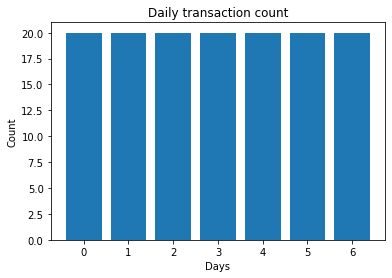

In [62]:
fig = plt.figure()
plt.bar(txn['day_of_the_week'],height=20,alpha=0.75)
plt.title('Daily transaction count')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

3.  Following the same logic as in section 1.2, generate the features that capture the countof  transactions  per  client,  year  and  day  of  the  week.   The  intermediate  MultiIndexdataframe (with nlevels=3) and the final pivoted output with a single index are shownin the snapshots below.

In [63]:
annual_day_of_week_counts_pivot = txn.groupby(['customer_id','YEAR','day_name'])['tran_amount'].count()
annual_day_of_week_counts_pivot = annual_day_of_week_counts_pivot.unstack(level=1) 
annual_day_of_week_counts_pivot = annual_day_of_week_counts_pivot.unstack(level=1) 
annual_day_of_week_counts_pivot.fillna(0,inplace=True)
annual_day_of_week_counts_pivot.head()

YEAR          2011                         ...   2015                           
day_name    Friday Monday Saturday Sunday  ... Sunday Thursday Tuesday Wednesday
customer_id                                ...                                  
CS1112         1.0    0.0      0.0    1.0  ...    0.0      0.0     0.0       1.0
CS1113         1.0    1.0      0.0    1.0  ...    0.0      0.0     0.0       1.0
CS1114         0.0    1.0      0.0    1.0  ...    0.0      1.0     0.0       0.0
CS1115         0.0    0.0      1.0    1.0  ...    0.0      1.0     0.0       0.0
CS1116         1.0    1.0      0.0    0.0  ...    0.0      0.0     0.0       0.0

[5 rows x 35 columns]

In [64]:
level_0 = annual_day_of_week_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = annual_day_of_week_counts_pivot.columns.get_level_values(1).astype(str)
annual_day_of_week_counts_pivot.columns = 'cnt_'+ level_0 + '_' + level_1
annual_day_of_week_counts_pivot = annual_day_of_week_counts_pivot.astype(int)
annual_day_of_week_counts_pivot.head()

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,cnt_2012_Sunday,cnt_2012_Thursday,cnt_2012_Tuesday,cnt_2012_Wednesday,cnt_2013_Friday,cnt_2013_Monday,cnt_2013_Saturday,cnt_2013_Sunday,cnt_2013_Thursday,cnt_2013_Tuesday,cnt_2013_Wednesday,cnt_2014_Friday,cnt_2014_Monday,cnt_2014_Saturday,cnt_2014_Sunday,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,0,0,1,1,0,1,1,0,0,2,1,0,0,1,0,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,1,0,0,0,0,1,0,1,2,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,2,1,1,1,0,1,2,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0


4. Confirm that your output has the same number of rows as the final output in section 1.2and save it asannualdayofweekcountspivot.xlsx. How many features/columnsdid you create in this section?



In [86]:
print('Number of rows confirmation : {}'.format(annual_day_of_week_counts_pivot.shape[0] == clnt_annual_aggregations_pivot.shape[0]))

Number of rows confirmation : True


In [66]:
print('Number of features {}'.format(annual_day_of_week_counts_pivot.shape[1]))

Number of features 35


In [67]:
#annual_day_of_week_counts_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

5.  Similarly,  generate  the  features  that  capture  the  count  of  transactions  per  client,month-end-date  and  day  of  the  week.   In  contrast  with  the  annual  pivot  table  inthe previous step, here you want to create the pivot with [’customerid’, ’MEDT’] asindex to obtain the following output dataframe.

In [68]:
month_df = txn.groupby(['customer_id','ME_DT','day_name'])['tran_amount'].count()
month_df = month_df.unstack(level=2) 
month_df.fillna(0,inplace=True)

In [69]:
month_df.columns = 'cnt_' + month_df.columns.values
month_df = month_df.astype(int)
month_df.head()

cnt_Friday  cnt_Monday  ...  cnt_Tuesday  cnt_Wednesday
customer_id ME_DT                               ...                            
CS1112      2011-06-30           0           0  ...            0              1
            2011-08-31           1           0  ...            0              0
            2011-10-31           0           0  ...            0              0
            2012-04-30           0           0  ...            0              0
            2012-06-30           0           0  ...            0              0

[5 rows x 7 columns]

6.  Join  withbasetablepdas  you  did  in  section  1.5  and  impute  with  your  choice  ofvalue for NaN. Save the final output asmthdaycounts.xlxs.

In [70]:
day_counts = base_table_pd.join(month_df,on = ["CLNT_NO", "ME_DT"])
day_counts = day_counts.sort_values(by = ["CLNT_NO","ME_DT"]).fillna(0)
day_counts.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
157064,CS1112,2011-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157058,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157044,CS1112,2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157069,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
157060,CS1112,2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#month_end_aggregations.to_excel('mth_day_counts.xlsx')

# 1.7  Date-related features: days since last transaction

1.  The  starting  point  is  again  thetxntable.   Recall  that  most  clients  have  a  singlepurchase  per  month,  but  some  clients  have  multiple  purchases  in  a  month.   Sinceyou want to calculate the ”days since last transaction”, you want to capture the lasttransaction in a month for every client.

In [72]:
last_monthly_purchase = pd.DataFrame(txn.groupby(['customer_id','ME_DT'])['txn_date'].max())
last_monthly_purchase.rename(columns={'txn_date':'last_monthly_purchase'},inplace=True)
last_monthly_purchase.head()

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24

2.  Joinbasetablepdwithlastmonthlypurchaseas  you  did  in  section  1.5.   Thesnapshot below shows the output of the created objectlastmonthlypurchasebasefor client CS1112 who made her/his first purchase on June 2011, then no purchase onJuly and made a purchase again on August 2011.  What values will you use to imputethe NaT values here?  NaT stands for ”Not a Timestamp”.

In [73]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on=['CLNT_NO','ME_DT'], how='left').sort_values(by=['CLNT_NO','ME_DT'])
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT


3.  To answer the imputation problem, we have to think what value should we use for sayJuly 2011 for ’lastmonthlypurchase’ ?  The answer is that in July the value for the last monthly purchase is the previous line value:  2011-06-15.  In other words, for everyclient we want to forward-fill the NaT values.While pandas fillna() method has a method to forward-fill,  here we want to use theapply  and  a  lambda  function  with  the  forward-fill  function  ffill(),  with  the  following expression:.apply(lambda x:  x.ffill()) applied on object last_monthly_purchase_base_grouped  by  CLNTNO.  Below,  I  am  showing  a  snapshot  for  lines[92:98] that confirm the transition between clients CS1113 and CS1114.You  can  also  recreate  the  forward-fill  with  the  fillna()  method,  however  there  is  adisadvantage and a reason the.apply() method is preferred here.

In [74]:
last_monthly_purchase_base = last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())

In [75]:
last_monthly_purchase_base[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


4.  Subtract  the  two  date  columns  and  convert  the  output  to  .dt.days  to  calculate  thecolumn ’dayssincelasttxn’ as shown in the following snapshot.

In [76]:
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT']-last_monthly_purchase_base['last_monthly_purchase']).dt.days

In [77]:
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


5.  Plot a histogram of the ’dayssincelasttxn’.  Based on the values you observe in thehistogram, impute the remaining NaN values (i.e.  for the initial months before a clientmakes a purchase).  Save the columns [’CLNTNO’, ’MEDT’, ’dayssincelasttxn’] asdayssincelasttxn.xlsx.

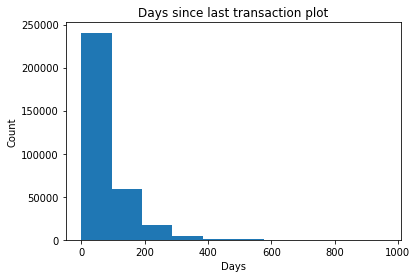

In [82]:
fig =  plt.figure()
plt.hist(last_monthly_purchase_base['days_since_last_txn'])
plt.title('Days since last transaction plot')
plt.ylabel('Count')
plt.xlabel('Days')
plt.show()

Since the distribution of data is skewed we replace the nan values with the median of the column.

In [79]:
median_last = last_monthly_purchase_base['days_since_last_txn'].median()

In [80]:
last_monthly_purchase_base['days_since_last_txn'] = last_monthly_purchase_base['days_since_last_txn'].fillna(median_last)
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,51.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


In [81]:
last_monthly_purchase_base[['CLNT_NO','ME_DT','days_since_last_txn']].to_excel('days_since_last_txn.xlsx',index=False)